**Amplifying the Probability of Sharing a Single Bit**

By: Jiale(Jerry)Chen and Vladimir Shpilrain

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import statistics
import scipy.stats as st
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Introduction

Consider two parties, Alice and Bob. Suppose Alice wants to privately send plaintexts $A$ to Bob over an open and insecure channel, in the presence of an adversary Eve(for eavesdropper). Also, Alice, Bob, and Eve are in the possession of the keys $K_A, K_B, and K_E$, respectively, and these are bit strings of length k. Suppose that the corresponding bits in $K_A and K_B$ are equal with probability p, and the corresponding bits in $K_A and K_E$ are equal with probability q < p.

Alice will use her key $K_A$ to encrypt a secret plaintext A as $A \oplus K_A$ and Bob will use his key $K_B$ decrypt ciphertexts as $(A \oplus K_A)\oplus K_B=A \oplus (K_A \oplus K_B)$, where $\oplus$ is the notation for the Boolean XOR operation. Bob’s decryption will be perfectly correct if p = 1, but may have errors if p < 1. More specifically, Bob will recover each bit of A correctly with probability p. At the same time, Eve will recover each bit of A correctly with probability q by computing $A \oplus (K_A \oplus K_E)$; Eve does not learn anything about A except perhaps its length). The closer p ($P(K_A=K_B)$) is to 1, the closer q ($P(K_E=K_A)$) is to 1. When p=1, q=1. This is unavoidable and well-known.

**The main goal of this project is to amplify p, while at the same time trying to amplify the gap p − q.** There is a standard way of amplifying p in the spirit of coding theory, as follows.

Denote $\bar{K_A}$ and $\bar{K_B}$ as the first 3 bits of $K_A$ and $K_B$, respectively. Let T be a bit string that consists of 3 identical bits b, say b = 1. Alice will send $T \oplus K_A$ to Bob. Then Bob will compute $T'=T \oplus (K_A \oplus K_B)$. Let b’ be the bit that prevails in $T′$. Then the probability that b′ is equal to b is the probability that out of 3 bits in T′ either 3 or 2 bits are equal to b. This probability is:

$p'=p^3+3p^2(1-p)=3p^2-2p^3=p^2(3-2p)>p$ if p>0.5

Similarly, the probability for Eve to recover b correctly is $q'=q^3+3q^2(1-q)=q^2(3-2q)$, and the difference between these probabilities is
$(3p^2-2p^3)-(3q^2-2q^3)=3(p^2-q^2)-2(p^3-q^3)=(p-q)(3p+3q-2p^2-2q^2-2pq)$.

For this difference to be greater than (p-q), we should have 
$3p+3q-2p^2-2q^2-2pq>1$, which often holds if p,q>0.5
For example, for the values p = 0.775, q = 0.75 that we have been working with, this expression is equal to 1.08625. Therefore, the gap p−q that originally was 0.775−0.75 = 0.025, now becomes p′ −q′ = 0.025 · 1.08625 = 0.027, if rounded to 3 decimal places. The value of p′ here is 0.871, if rounded to 3 decimal places.

https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb



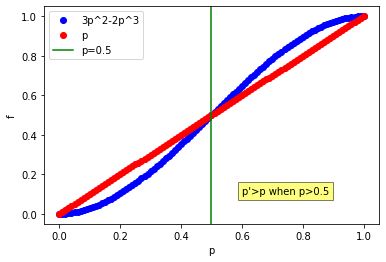

In [7]:
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].
possible_p_values=np.linspace(0.0, 1.0, num=101)

def function1(p):
  return 3*p*p-2*p*p*p

plt.plot(possible_p_values,function1(possible_p_values),'bo--',label='3p^2-2p^3',linewidth=0.01)
plt.plot(possible_p_values,possible_p_values,'ro--',label='p',linewidth=0.01)
plt.axvline(x = 0.5, color = 'g', label = 'p=0.5')
plt.xlabel("p")
plt.ylabel("f")
plt.text(0.6,0.1,"p'>p when p>0.5",bbox=dict(facecolor='yellow', alpha=0.5))
plt.legend()
plt.show()

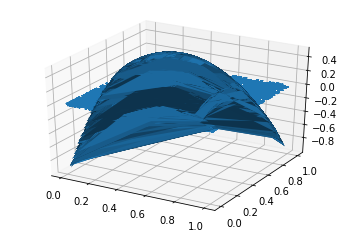

In [8]:
def function2(p,q):
  return 3*p+3*q-2*p*p-2*q*q-2*p*q-1
ps=[]
ps1=[]
for i in range(0,1000):
  ps.append(random.uniform(0, 1))
  ps1.append(random.uniform(0, 1))
ps=np.array(ps)
ps1=np.array(ps1)

X,Y = np.meshgrid(ps,ps1)
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.scatter3D(ps,ps,function2(ps,ps))
ax.plot_surface(X,Y,function2(X,Y))
ax.plot_wireframe(X,Y,0*X+0*Y)

Text(0, 0.5, 'q')

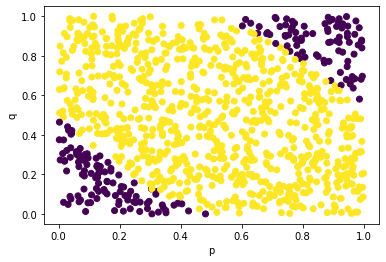

In [9]:
y=[]
for i in range(0,1000):
  if function2(ps[i],ps1[i])<0:
    y.append(-1)
  else:
    y.append(1)
y=np.array(y)
plt.scatter(ps,ps1,c=y)
plt.xlabel("p")
plt.ylabel('q')

# Using the Central Limit Theorem
Alice wants to send a secret number to Bob over an open channel. She does that by sending a sequence of $N$ bits, so that the sum of bits (equivalently, the number of "1" bits) is her secret number, called $S$. Only Alice knows $S$(the number of 1 bits in the bit string $A$). $K_A$ is Alice's private encryption key; $A \oplus K_A$, a modified version of $A$, is available to the public and what Alice sends to Bob.

For whatever reason, each bit is transmitted correctly with a fixed probability $p<1$. That is, with probability $(1-p)$, any bit b transmitted by Alice is received as $(1-b)$ by Bob. $K_A$ will be transformed into $K_B$ with the probability “p” of keeping a bit “b” and with the probability (1-p) of changing a bit to “1-b”. In other words, each bit in $K_A \oplus K_B$ is 0 has a probability of p.

When we add ($K_A \oplus K_B$) to $A$, each bit of $A$ remains unchanged with a probability $p$. Knowing $B=A \oplus (K_A \oplus K_B)$ and $p$, Bob can compute the expected value of $S'$, and thereby estimate $S$. **Our goal will be to figure out how accurate this estimation of $S$ is.**

-----------------
Assume $p(b_i=1)=a$ and $p(b_i=0)=1-a$ where $1 \le i \le N$ and i is an integer
1. Proof for E(S)=N*a

$S=b_1+b_2+b_3+...+b_N$ by definition

$E(S)=E(b_1)+E(b_2)+E(b_3)+...+E(b_N)$ 

=$[p(b_1=1)*1+p(b_1=0)*0]+[p(b_2=1)*1+p(b_2=0)*0]+...+[p(b_N=1)*1+p(b_N=0)*0]$

=$\sum_{i=1}^{N}{[p(b_i=1)*1+p(b_i=0)*0]}$

=$N*(a*1+(1-a)*0)$ since $b_i$ is iid

=N*a

--------------
2. Proof for E(S’)=2pS+N-S-p*N

$E(S’)=E(b'_1)+E(b'_2)+E(b'_3)+...+E(b'_N)$

=$[p(b'_1=b_1)*b_1+p(b'_1=1-b_1)*(1-b_1)]+[p(b'_2=b_2)*b_2+p(b'_2=1-b_2)*(1-b_2)]+...+[p(b'_N=b_N)*b_N+p(b'_N=1-b_N)*(1-b_N)]$

=$[p*b_1+(1-p)*(1-b_1)]+[p*b_2+(1-p)*(1-b_2)]+...+[p*b_N+(1-p)(1-b_N)]$

=$p*(b_1+b_2+...+b_N)+(1-p)*(1-b_1+1-b_2+...+1-b_N)$

By definition, $S=b_1+b_2+...+b_N$

$E(S’)=p*S+(1-p)*(N*1-(b_1+b_2+...+b_N))$

=p*S+(1-p)*(N-S)

=p*S+N-S-p*N+p*S

=2pS+N-S-p*N

=(2*p-1)*S+N*(1-p)

---------
3. Estimate S using S’

E(S')=(2*p-1)*S+N*(1-p)

$S=\frac{E(S')-N*(1-p)}{2p-1}$

**generate the bit string A with N=1000 and user-defined a**

In [14]:
#a is the probability of getting 1; p(b=1)=a and p(b=0)=1-a
#throw the coin N times and generate the bit string A 

#random.choices() method in Python
#returns multiple random elements from the list with replacement. You can weigh the possibility of each result with the weights parameter 
def toss_coin(N,a):
  mylist=[0,1]#possible values of coin toss
  return (random.choices(mylist, weights = [1-a,a], k = N))

N=1000
a=float(input("please enter a decimal between 0 and 1 for the p(bi=1) for A:"))
print("For A, p(bi=1)=",a)

please enter a decimal between 0 and 1 for the p(bi=1) for A:0.5
For A, p(bi=1)= 0.5


**generate the bit string B(string received by Bob): A after mutation**

In [15]:
#p(b'=b)=p and p(b'=1-b)=1-p
def mut(p,b):
  x=random.random()
  if x<1-p:#the bit does change
    return 1-b
  else:#the bit does not change
    return b

# print(mut(1,0))
def s_mutation(S,p):
  y=S[:]
  N=len(S)
  for i in range(1,(1+N)):
    x=mut(p,y[i-1])
    y[i-1]=x
  return y

**accuracy calculation** 

In [16]:
def p_values_v(a,b,n):#possible p values: p is the prob of keeping a bit b  
#n is the number of data points you want, including a and b
  dt=(b-a)/(n-1)
  Ps=[None]*n
  for i in range(1,(n+1)):
    Ps[i-1]=a+(i-1)*dt
  Pss=np.array(Ps)#transforming a list into array
  not_half=Pss!=0.5#eliminate 0.5
  Pv=Pss[not_half]#mask indexing
  return Pv

#print(p_values_v(0,1,101))

def acc_calc(Aesti,As):
  dev=abs(Aesti-As)#difference between As and Aesti
  acc=1-dev/As#accuracy rate
  return acc


conducting the experiment 1000 times

$K_A$ is set to be toss_coin(1000,0.5)

In [17]:
def exp_1000(N,a,p,iter=10000):
  KA=toss_coin(N,0.5)#Alice's encryption key
  KAa=np.array(KA)

  # iter=10000
  As=np.zeros(iter)
  Bs=np.zeros(iter)
  Aesti=np.zeros(iter)
  
  for i in range(1,(iter+1)):
    A=toss_coin(N,a)#Alice's bit string
    Aa=np.array(A)

    KB=s_mutation(KA,p)#Bob's decryption key
    KBb=np.array(KB)

    B=Aa ^ KAa ^ KBb#information that is given to Bob

    As[i-1]=np.sum(Aa)
    Bs[i-1]=np.sum(B)
    Aesti[i-1]=(Bs[i-1]-N*(1-p))/(2*p-1)#estimated value
  return As,Aesti

In [18]:
# def data_gen(N,a):
#   Pv=p_values_v(0,1,3)#interval for p: 0.4<p<0.6 with a stepsize of 0.01
#   iter=len(Pv)
#   accs=np.zeros(iter)#used to store the accuracy for diff p values  
#   for i in range(0,iter):
#     As,Aesti=exp_1000(N,a,Pv[i])
#     acc=acc_calc(Aesti,As)
#     accs[i]=acc
#   return Pv, accs

# Conducting the Experiments: p=0.7 and q=0.755

Generata data points: 100000 experiments; 100000 data points

In [19]:
As1,Aesti1=exp_1000(N,a,0.7)#"Eve"
As2,Aesti2=exp_1000(N,a,0.755)#"Bob"
xs=np.arange(1,10001,1)
As1

array([498., 480., 523., ..., 485., 479., 528.])

Create histograms for S and S'

1.   Normal distribution: data is normally distributed;conducting the experiments 10000 times



[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.6 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.4 0.5 ... 0.5 0.4 0.5]
it seems that Bob's estimate is slight larger



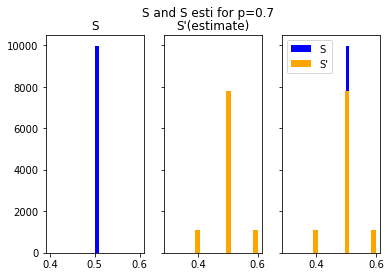

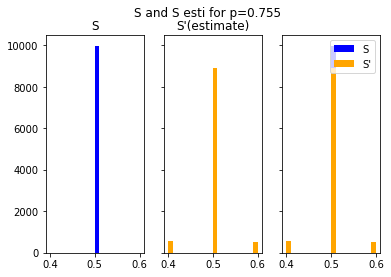

In [20]:
def plot_hist_p(As1,Aesti1,a):
  fig,axs=plt.subplots(1,3,sharey=True)
  axs[0].hist(As1,bins=20,color="blue")
  axs[0].set_title("S")
  axs[0].set_label("frequency")
  axs[1].hist(Aesti1,bins=20,color="orange")
  axs[1].set_title("S'(estimate)")
  axs[2].hist(As1,bins=20,color="blue",label="S")
  axs[2].hist(Aesti1,bins=20,color="orange",label="S'")
  axs[2].legend()
  fig.suptitle(a)


# df1=As1-Aesti1
# df2=As2-Aesti2
# print(sum(df1>0))
# print(sum(df2>0))
As1=As1/1000
Aesti1=Aesti1/1000
As2=As2/1000
Aesti2=Aesti2/1000

def round1(As1,n=1):
  for i in range(0,len(As1)):
    As1[i]=round(As1[i],n)
  return As1

As1=round1(As1,1)
Aesti1=round1(Aesti1,1)
As2=round1(As2,1)
Aesti2=round1(Aesti2,1)

print(As1)
print(Aesti1)
print(As2)
print(Aesti2)

plot_hist_p(As1,Aesti1,"S and S esti for p=0.7")
plot_hist_p(As2,Aesti2,"S and S esti for p=0.755")
print("it seems that Bob's estimate is slight larger")
print("")

Calculate mean, sample variance, std, SEM, and CI

In [21]:
#assume 95% confidence interval

def print_stat(As1):
  mn=statistics.mean(As1)
  print("mean:",mn)
  ct=len(As1)
  print("count:",ct)
  var=statistics.variance(As1)
  print("sample variance:",var)
  std=math.sqrt(var)
  print("std:",std)
  print("sem:",std/math.sqrt(ct))
  #output t value for 95% confidence interval
  tv=st.t.ppf(0.025, ct-1,)#alpha=(1-95%)/2
  print("t-value:",tv)
  print("lower bound of CI:",mn+tv*std/math.sqrt(ct))
  print(st.t.interval(alpha=0.95, df=ct-1, loc=mn, scale=st.sem(As1)))

# print("for p=0.7")
# print_stat(As1)
# print("------------")
# print_stat(Aesti1)
# print()
# print("for p=0.755")
# print_stat(As2)
# print("------------")
# print_stat(Aesti2)


**Confidence Interval for the difference in means**

In [22]:
def CI_diff_in_means(As1,Aesti1):
  cm = sms.CompareMeans(sms.DescrStatsW(As1), sms.DescrStatsW(Aesti1))
  print(cm.tconfint_diff(usevar='unequal'))

print("confidence interval for the diff in means: p=0.7")
CI_diff_in_means(As1,Aesti1)
print("confidence interval for the diff in means: p=0.755")
CI_diff_in_means(As2,Aesti2)

confidence interval for the diff in means: p=0.7
(-0.0011257012905064236, 0.0007257012905063566)
confidence interval for the diff in means: p=0.755
(-0.00010948403288976423, 0.0011894840328899562)


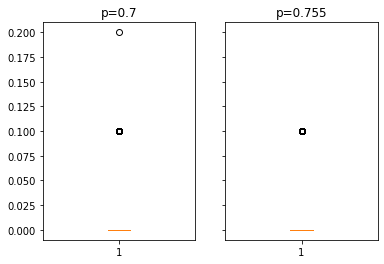

In [23]:
dif1=abs(Aesti1-As1)
dif2=abs(Aesti2-As2)
# plt.scatter(xs,dif1,label='0.7')
# plt.scatter(xs,dif2,label='0.755')
# plt.xlabel("experiment #")
# plt.ylabel("abs difference between sum(A) and esti sum(A)")
# plt.legend()
# plt.show()
# print("the higher the p value, the more accurate in the approximation of S")

fig,axs=plt.subplots(1,2,sharey=True,)
axs[0].boxplot(dif1)
axs[0].set_title("p=0.7")
axs[1].boxplot(dif2)
axs[1].set_title("p=0.755")
plt.show()

distribution of $|K_A-K_B|$ and $|K_A-K_E|$

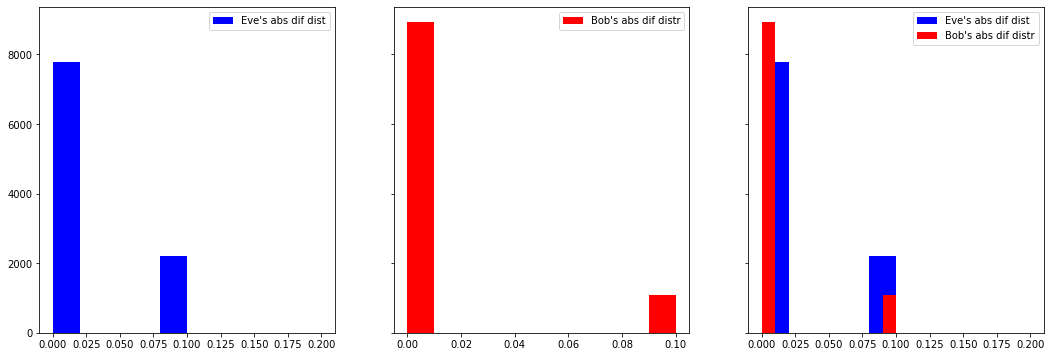

In [32]:
fig,axs=plt.subplots(1,3,sharey=True,figsize=(18,6))
axs[0].hist(dif1,label="Eve's abs dif dist",color="blue")
axs[0].legend()
axs[1].hist(dif2,label="Bob's abs dif distr",color="red")
axs[1].legend()
axs[2].hist(dif1,label="Eve's abs dif dist",color="blue")
axs[2].hist(dif2,label="Bob's abs dif distr",color="red")
axs[2].legend()


Count of experiments that Bob and Eve guesses S(A) correctly

In [24]:
def count_right(Aesti1,As1,Aesti2,As2):
  # pp1=Aesti1/N
  cc1=sum(Aesti1==As1)
  print("the count of experiments that Eve guesses S(A) exactly correctly(p=0.7):",cc1)

  # pp2=Aesti2/N
  cc2=sum(Aesti2==As2)
  print("the count of experiments that Bob guesses S(A) exactly correctly(p=0.755):",cc2)

count_right(Aesti1,As1,Aesti2,As2)

# for i in range(1,6):
#   As1,Aesti1=exp_1000(N,a,0.7)
#   As2,Aesti2=exp_1000(N,a,0.755)
#   As1=As1/1000
#   Aesti1=Aesti1/1000
#   As2=As2/1000
#   Aesti2=Aesti2/1000

#   As1=round1(As1,2)
#   Aesti1=round1(Aesti1,2)
#   As2=round1(As2,2)
#   Aesti2=round1(Aesti2,2)
#   print("exp10000: ",i)
#   count_right(Aesti1,As1,Aesti2,As2)
#   print()

the count of experiments that Eve guesses S(A) exactly correctly(p=0.7): 7791
the count of experiments that Bob guesses S(A) exactly correctly(p=0.755): 8924


# Play with Different p and q

In [25]:
def count_right1(Aesti1,As1,Aesti2,As2,p,q):
#p is for Bob
  cc1=sum(Aesti1==As1)
  print("p=",p)
  print("the count of experiments that Bob guesses S(A) exactly correctly",cc1)

#q is for Eve
  cc2=sum(Aesti2==As2)
  print("q=",q)
  print("the count of experiments that Eve guesses S(A) exactly correctly",cc2)
#N: the length of the bit string
#a: prob(bit=1)
#n: number of decimal places
#p: Bob's prob of guessing a bit correctly
#q: Eve's b=prob of guessing a bit correctly
def pq_comb(N,a,p,q,iter=10000,n=1):
  As1,Aesti1=exp_1000(N,a,p,iter)
  As2,Aesti2=exp_1000(N,a,q,iter)
  xs=np.arange(1,iter+1,1)

  #trying to guess S(A)/N: a
  As1=As1/N
  Aesti1=Aesti1/N
  As2=As2/N
  Aesti2=Aesti2/N

  #rounded to one decimal place.
  As1=round1(As1,n)
  Aesti1=round1(Aesti1,n)
  As2=round1(As2,n)
  Aesti2=round1(Aesti2,n)
  count_right1(Aesti1,As1,Aesti2,As2,p,q)
  cc1=sum(Aesti1==As1)
  cc2=sum(Aesti2==As2)
  return cc1,cc2

#please do 100,000 experiments; change iter to 100,000
cc1,cc2=pq_comb(1000,0.5,0.755,0.7,100000,1)
print(cc1)
print(cc2)

p= 0.755
the count of experiments that Bob guesses S(A) exactly correctly 89251
q= 0.7
the count of experiments that Eve guesses S(A) exactly correctly 78174
89251
78174


In [27]:
def pq_comb_pairs(N,a,ps,qs,iter=10000):
  n=len(ps)
  c1=np.zeros(n)
  c2=np.zeros(n)
  for i in range(0,n):
    cc1,cc2=pq_comb(1000,0.5,ps[i],qs[i],100000,1)
    c1[i]=cc1
    c2[i]=cc2
  return c1,c2

#N:1000; length of bit string

c1,c2=pq_comb_pairs(1000,0.5,np.array([0.755,0.933,0.9992]),np.array([0.701,0.856,0.9985]),100000)
print(c1)
print(c2)

p= 0.755
the count of experiments that Bob guesses S(A) exactly correctly 89474
q= 0.701
the count of experiments that Eve guesses S(A) exactly correctly 80277
p= 0.933
the count of experiments that Bob guesses S(A) exactly correctly 99428
q= 0.856
the count of experiments that Eve guesses S(A) exactly correctly 97578
p= 0.9992
the count of experiments that Bob guesses S(A) exactly correctly 99978
q= 0.9985
the count of experiments that Eve guesses S(A) exactly correctly 99972
[89474. 99428. 99978.]
[80277. 97578. 99972.]


The closer p is to 1, the closer q is to 1. When p is not too close to 1, the gap between p and q can be substantial. Finding the probability distribution and paramter values that would maximize the gap between p and q while pushing p closer to 1 is therefore an obvious direction of the future research.

# Reference

[1] M. Bessonov, D. Grigoriev, V. Shpilrain, Public key establishment with possible errors, preprint.

[2] Python code: PROBKA (PROBabilistic Key Agreement), http://shpilrain.ccny.cuny.edu/PROBKA.py.
txt